In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_sample_image

In [3]:
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255

In [4]:
images = np.array([china, flower])

In [5]:
batch_size, height, width, channels = images.shape

In [6]:
filters = np.zeros(shape = (7,7, channels, 2), dtype = np.float64)

In [7]:
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

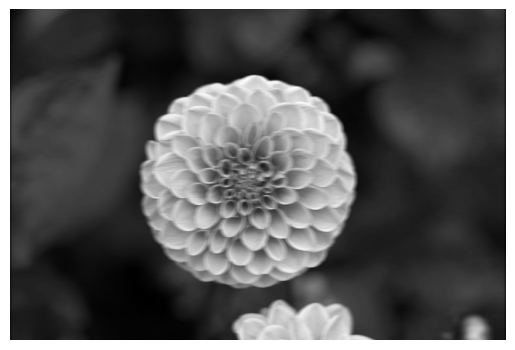

In [8]:
import tensorflow as tf
from tensorflow import keras

outputs = tf.nn.conv2d(images, filters, strides = 1, padding = 'SAME')
plt.imshow(outputs[1, :, :, 1], cmap = 'gray')
plt.axis("off")
plt.show()

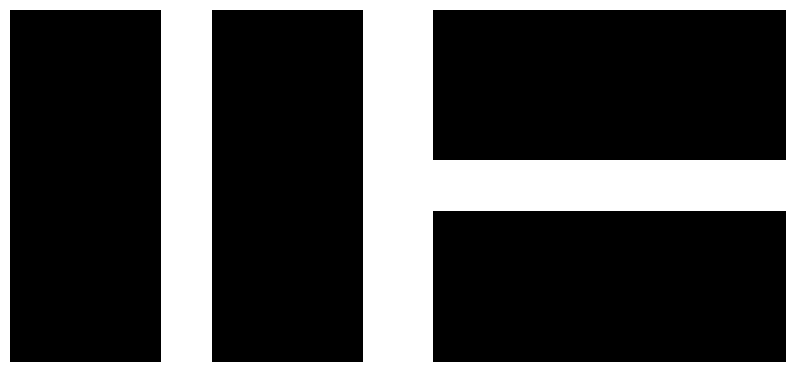

In [117]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(filters[:, :, 0, 0], cmap = 'gray')
plt.axis('off')

plt.subplot(122)
plt.imshow(filters[:, :, 0, 1], cmap = 'gray')
plt.axis('off')
plt.show()

In [10]:
def crop(images):
    return images[170:250, 130:250]

In [11]:
conv = keras.layers.Conv2D(kernel_size = 7, filters = 2, strides = 1, padding = 'SAME', 
                           activation = 'relu', input_shape = outputs.shape)
conv_out = conv(images)
conv_out.shape

TensorShape([2, 427, 640, 2])

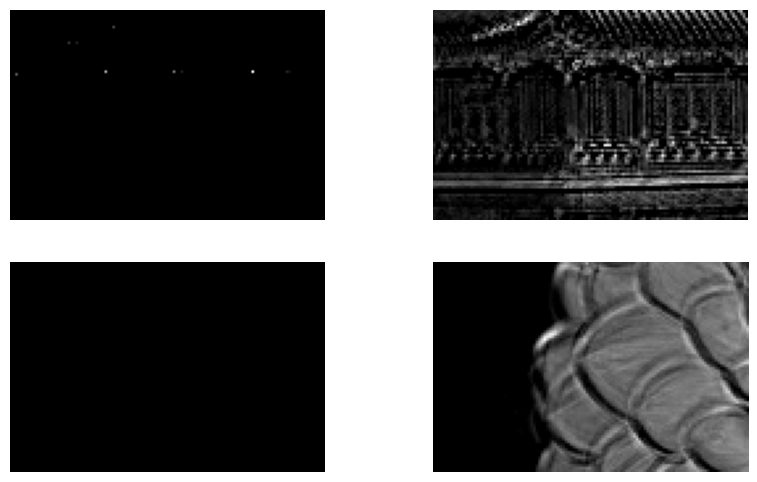

In [12]:
plt.figure(figsize = (10,6))
for image_index in (0,1):
    for feature_map_index in (0,1):
        plt.subplot(2,2, image_index*2 + feature_map_index + 1)
        plt.imshow(crop(conv_out[image_index, :, :, feature_map_index]), cmap = 'gray')
        plt.axis('off')
plt.show()

In [13]:
max_pool = keras.layers.MaxPool2D(pool_size = 2)
cropped_images = np.array([crop(image) for image in images], dtype = np.float64)
output = max_pool(cropped_images)

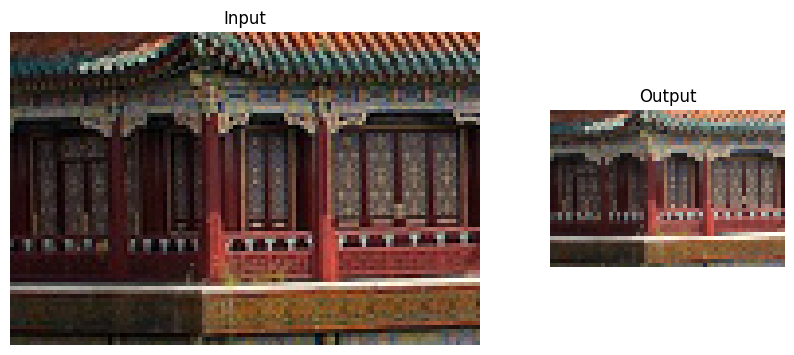

In [14]:
fig = plt.figure(figsize = (10,6))
gs = mpl.gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios = [2,1])
ax1 = fig.add_subplot(gs[0,0])
ax1.set_title("Input")
ax1.imshow(cropped_images[0])
ax1.axis('off')
ax2 = fig.add_subplot(gs[0,1])
ax2.set_title("Output")
ax2.imshow(output[0])
ax2.axis('off')
plt.show()

In [15]:
print(f"Output of image before max pool: {cropped_images[0].shape}")
print(f"Output of image after max pool: {output[0].shape}")

Output of image before max pool: (80, 120, 3)
Output of image after max pool: (40, 60, 3)


In [16]:
avg_pool = keras.layers.AvgPool2D(pool_size = 2)
output_avg = avg_pool(cropped_images)

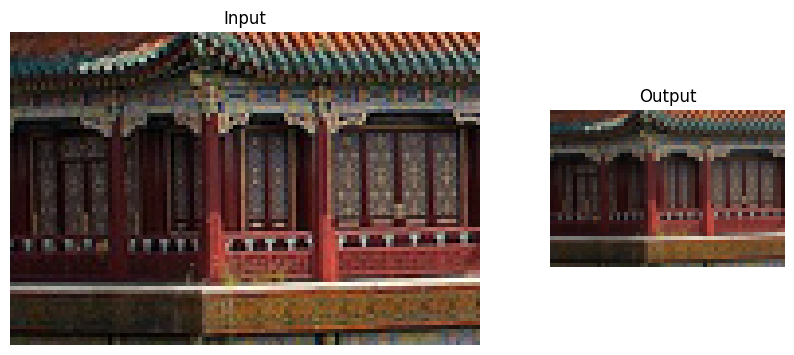

In [17]:
fig = plt.figure(figsize = (10,6))
gs = mpl.gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios = [2,1])
ax1 = fig.add_subplot(gs[0,0])
ax1.set_title("Input")
ax1.imshow(cropped_images[0])
ax1.axis('off')
ax2 = fig.add_subplot(gs[0,1])
ax2.set_title("Output")
ax2.imshow(output_avg[0])
ax2.axis('off')
plt.show()

In [18]:
global_avg = keras.layers.GlobalAvgPool2D()
output_global_avg = global_avg(cropped_images)
output_global_avg

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.31511125, 0.23021907, 0.19828056],
       [0.54114306, 0.44743252, 0.3047102 ]], dtype=float32)>

In [19]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [20]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [21]:
X_train, y_train = X_train_full[:50000], y_train_full[:50000]
X_valid, y_valid = X_train_full[50000:], y_train_full[50000:]

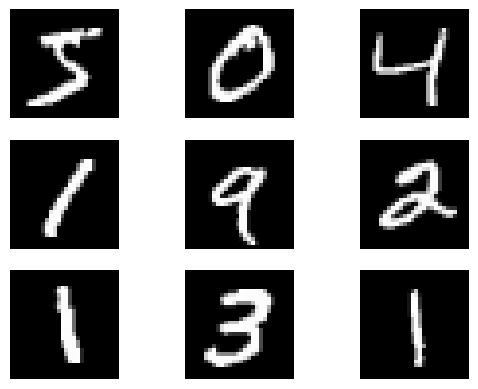

In [45]:
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')

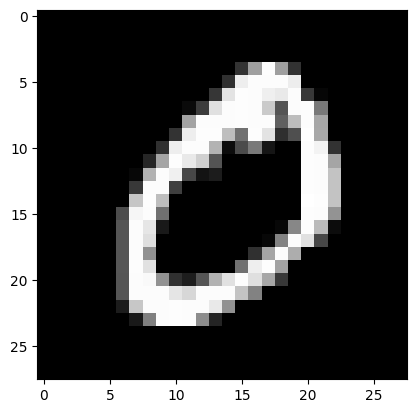

In [47]:
plt.imshow(X_train[1], cmap = 'gray')

In [22]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size = 3, padding = 'SAME', activation = 'relu', input_shape = [28,28,1]),
    keras.layers.Conv2D(64, kernel_size = 3, padding = 'SAME', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dropout (Dropout)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [24]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [25]:
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 10, batch_size = 32)

Epoch 1/10
1563/1563 [==============================] - 85s 53ms/step - loss: 0.2074 - accuracy: 0.9378 - val_loss: 0.0584 - val_accuracy: 0.9823
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.0855 - accuracy: 0.9739 - val_loss: 0.0467 - val_accuracy: 0.9870
Epoch 3/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.0643 - accuracy: 0.9801 - val_loss: 0.0439 - val_accuracy: 0.9886
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0451 - val_accuracy: 0.9881
Epoch 5/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0379 - val_accuracy: 0.9898
Epoch 6/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.0390 - accuracy: 0.9872 - val_loss: 0.0425 - val_accuracy: 0.9886
Epoch 7/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0402 -

In [48]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0265 - accuracy: 0.9919


[0.026486767455935478, 0.9919000267982483]

In [49]:
model.save("final_model.h5")

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
from tensorflow.keras.models import load_model

mnist_model = load_model("final_model.h5")

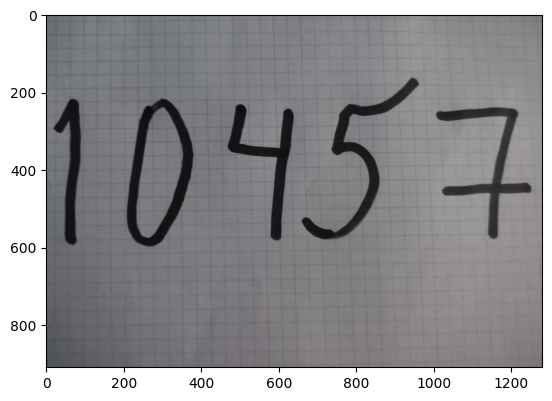

In [128]:
import cv2

image = cv2.imread('nums.jpg')
plt.imshow(image)

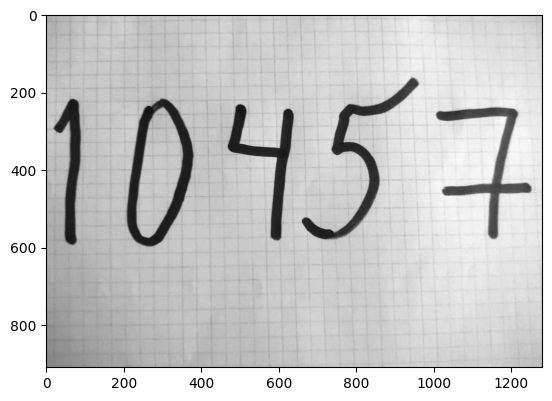

In [129]:
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
plt.imshow(grey, cmap='gray')

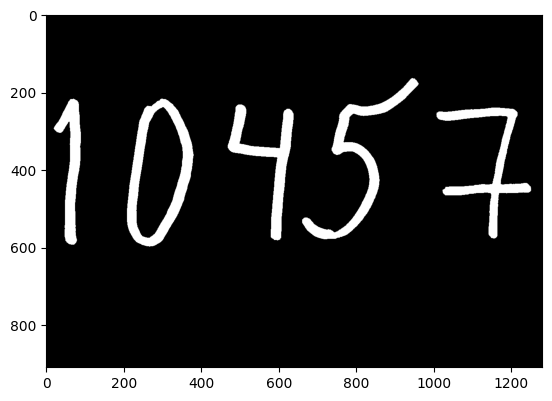

In [130]:
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')

In [132]:
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

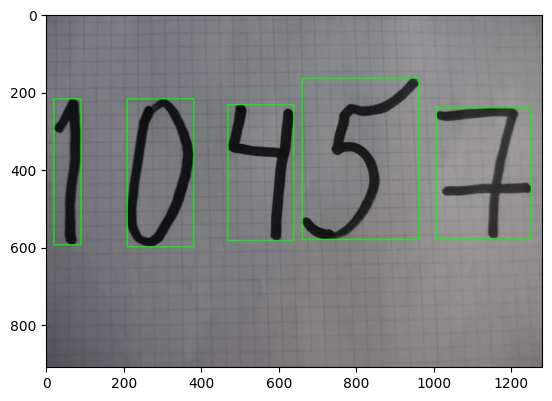

In [133]:
preprocessed_digits = []
threshold_area = 50  
for c in contours:
    if cv2.contourArea(c) > threshold_area:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)    
        digit = thresh[y:y+h, x:x+w]    
        resized_digit = cv2.resize(digit, (18,18))    
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)    
        preprocessed_digits.append(padded_digit)

plt.imshow(image, cmap = 'gray')
plt.show()

1/1 [==============================] - 0s 32ms/step


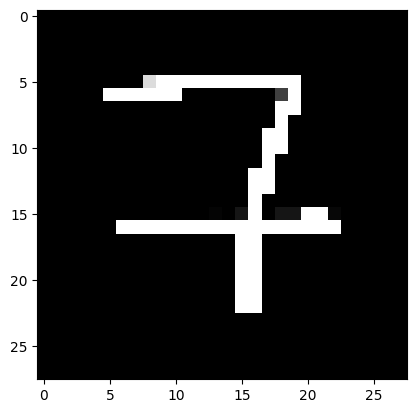

Prediction: 7
----------------------------------------------------------
1/1 [==============================] - 0s 55ms/step


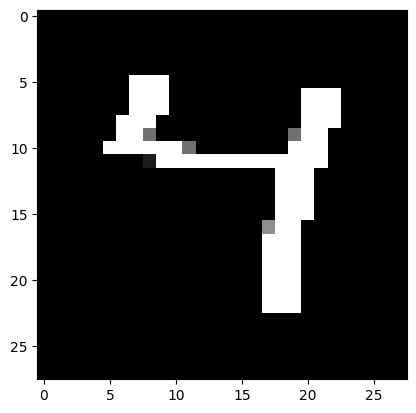

Prediction: 7
----------------------------------------------------------
1/1 [==============================] - 0s 32ms/step


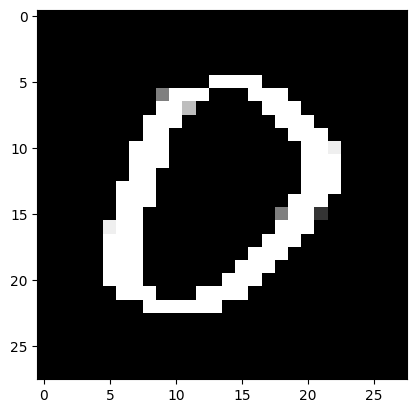

Prediction: 0
----------------------------------------------------------
1/1 [==============================] - 0s 30ms/step


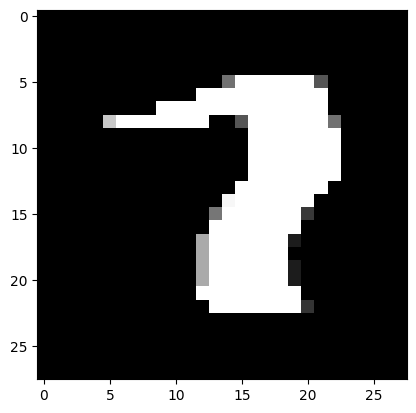

Prediction: 2
----------------------------------------------------------
1/1 [==============================] - 0s 48ms/step


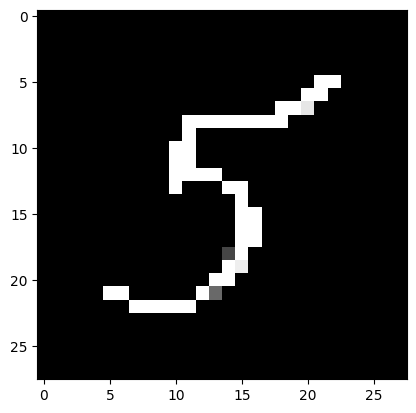

Prediction: 5
----------------------------------------------------------


In [140]:
for digit in preprocessed_digits:
    prediction = mnist_model.predict(digit.reshape(1,28,28,1))
    plt.imshow(digit.reshape(28,28), cmap = 'gray')
    plt.show()
    print(f"Prediction: {np.argmax(prediction)}")
    print('----------------------------------------------------------')

In [136]:
x_4 = X_train[np.where(y_train == 4)]
y_4 = y_train[np.where(y_train == 4)]

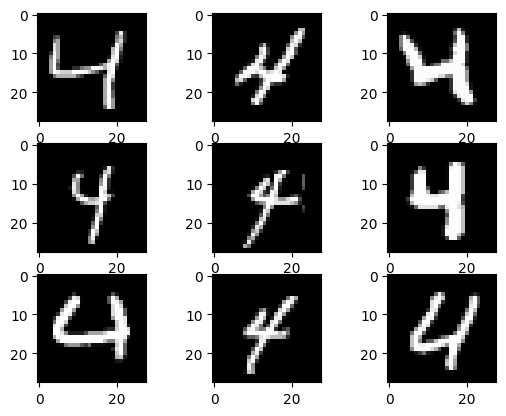

In [138]:
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(x_4[i], cmap = 'gray')